<a href="https://colab.research.google.com/github/Balwant195/CV-Harris-Corner-Detection/blob/main/Computer_Vision_Assignment_2_Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = np.asarray(Image.open("/content/drive/MyDrive/Computer Vision/Harris Corner Image.jpg").convert("L"))

In [ ]:
image.shape

(600, 800)

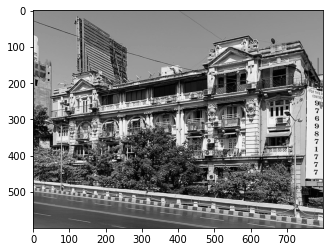

In [ ]:
plt.imshow(image,"gray")

In [ ]:
image = image/255

In [ ]:
def convolution(image, filter):
    m, n = filter.shape
    a, b = image.shape
    x = a - m + 1
    y = b - n + 1
    con_image = np.zeros((a,b))
    for i in range(x):
      for j in range(y):
        con_image[i][j] = np.sum(image[i:i+m, j:j+n]*filter)

    return con_image

In [ ]:
def Harris_corner(image, k , threshold):
  sobelx = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

  sobely = sobelx.T

  weight = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]))

  # derivatives of image
  Ix = convolution(image, sobelx)
  Iy = convolution(image, sobely)

  # product of derivatives
  Ix2 = Ix*Ix
  Iy2 = Iy*Iy
  Ixy = Ix*Iy

  # weighted sum of product
  Sx2 = convolution(Ix2, weight)
  Sy2 = convolution(Iy2, weight)
  Sxy = convolution(Ixy, weight)

  # R matrix
  detM = Sx2 * Sy2 - np.square(Sxy)
  traceM = Sx2 + Sy2
  R = detM - k*(traceM**2)

  # corner index
  corner_index = np.argwhere(R>threshold)

  plt.imshow(image,"gray")
  plt.plot(corner_index[:, 1], corner_index[:, 0], 'r.')

  return None

In [ ]:
k, threshold = 0.2, 0.5

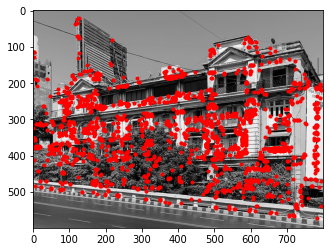

In [ ]:
Harris_corner(image, k, threshold)